# **Techlent Regression Project: Providing data-driven suggestions for customers**

We are an agency helping our customers purchase XoX (a made-up product) from various makers. Price is one of the most important things we care about. We need to estimate the price of a XoX before we recommend it to our customers. However, the estimations vary significantly with our employees' experience. 

We would like you to build a machine learning model to accurately predict the price for a future purchase and provide insights to help us explain the predicted price to our customers. Please note that neither our customers nor us have any knowledge about machine learning. A sample of our sales record is available in ../data/sales.csv.


1. Preprocess, clean, analyze and visualized the provided data. A few sentences or plots describing your approach will suffice. Any thing you would like us to know about the price?
2. Build a machine learning model to help us determine the price for a purchase. Discuss why you choose the approaches, what alternatives you consider, and any concerns you have. How is the performance of your model?
3. Help us understand how the price is predicted (again, a few sentences will suffice).

PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

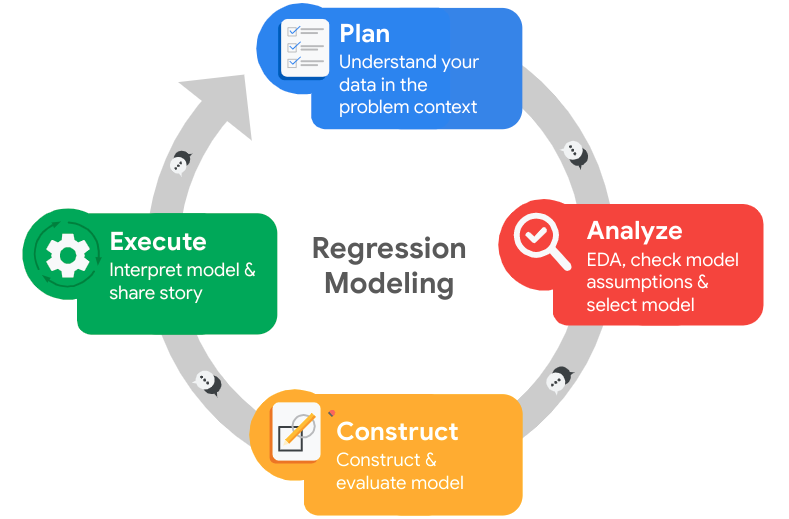

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem

🗒
### Understand the business scenario and problem

We are an agency helping our customers purchase XoX (a made-up product) from various makers. 
**The purpose** of this model is to estimate the price of a XoX before we recommend it to our customers .
  
**The goal** of this model is to accurately predict which makers can provide the lower-price product for a future purchase and provide insights to help us explain the predicted price to our customers (non tech background). 

### Familiarize yourself with the HR dataset

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project? *customers who want to buy XoX product*
- What are you trying to solve or accomplish? *Predict the product price and provide data-driven insight*
- What are your initial observations when you explore the data? (product_type, product_level, maker, ingredient may relate with each other) (weight, height, width, depth are relavent)
- Do you have any ethical considerations in this stage?

## Step 1. Imports

*   Import packages
*   Load dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('sales.csv')

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

### Gather basic information about the data
 We can start by loading the dataset and examining its structure, dimensions, and the first few rows. This will give us a general overview of the data. 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cost           2216 non-null   object
 1   price          3186 non-null   object
 2   weight         3193 non-null   object
 3   purchase_date  3196 non-null   object
 4   product_type   3196 non-null   object
 5   product_level  3196 non-null   object
 6   maker          2373 non-null   object
 7   ingredient     2941 non-null   object
 8   height         3197 non-null   object
 9   width          3193 non-null   object
 10  depth          3193 non-null   object
dtypes: object(11)
memory usage: 274.9+ KB


In [3]:
# Display the dimensions of the dataset
print("Dataset dimensions:", df.shape)

Dataset dimensions: (3197, 11)


In [4]:
# Preview the first few rows of the dataset
df.head(5)

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


### Gather descriptive statistics about the data


In [5]:
# Calculate descriptive statistics
descriptive_stats = df.describe()

# Display descriptive statistics
print("Descriptive statistics:\n")
print(descriptive_stats.to_string(float_format="{:.2f}".format))

Descriptive statistics:

        cost    price      weight purchase_date product_type product_level   maker ingredient       height  width  depth
count   2216     3186        3193          3196         3196          3196    2373       2941         3197   3193   3193
unique   185     3157         119          1278           64             5     882       2833          161     41     13
top     $66k  $20,061  3 Ton 0 Kg   Oct 05 2001            D      advanced  M14196   IN732638  2.54 meters  99 cm  26 cm
freq     104        2         127             8          485          1323      17          8           63    268    903


### Check missing values

In [6]:
# Check missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing values:\n")
print(missing_values)

Missing values:

cost             981
price             11
weight             4
purchase_date      1
product_type       1
product_level      1
maker            824
ingredient       256
height             0
width              4
depth              4
dtype: int64


In [7]:
# Filter the DataFrame for rows with 4 missing values in the "weight" column
rows_with_4_weight_missing = df[df['weight'].isna()].loc[:, 'cost':'depth']

# Print the resulting rows
print(rows_with_4_weight_missing)

       cost    price weight purchase_date product_type   product_level  \
384     NaN      NaN    NaN           NaN          NaN             NaN   
936     NaN  $13,966    NaN   Jun 12 2015          N,D    intermediate   
1503    NaN   $4,936    NaN   Jul 15 2015            H  super advanced   
2844  $122k  $55,901    NaN   Jul 27 2012          S,N  super advanced   

       maker                                         ingredient      height  \
384      NaN                                                NaN  nan meters   
936      NaN                                                NaN  nan meters   
1503  M14657  IN733656,IN732217,IN732973,IN732605,IN732086,I...  nan meters   
2844     NaN                IN732438,IN732061,IN732861,IN733229  nan meters   

     width depth  
384    NaN   NaN  
936    NaN   NaN  
1503   NaN   NaN  
2844   NaN   NaN  


### Check duplicates


In [8]:
# Check for duplicates
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Display the number of duplicates
print("Number of duplicate records:", num_duplicates)

Number of duplicate records: 0


In [9]:
# Find the row index with a missing value in 'product_level'
missing_row_index = df[df['purchase_date'].isnull()].index[0]

# Display the row containing the missing value
missing_row = df.iloc[missing_row_index]
print(missing_row)

cost                    NaN
price                   NaN
weight                  NaN
purchase_date           NaN
product_type            NaN
product_level           NaN
maker                   NaN
ingredient              NaN
height           nan meters
width                   NaN
depth                   NaN
Name: 384, dtype: object


In [10]:
# Drop the row with index 384
df = df.drop(384)

# Verify the changes
print(df.head())

    cost     price        weight purchase_date product_type product_level  \
0  $333k  $300,492   3 Ton 90 Kg   Dec 19 2008          Q,B      advanced   
1    NaN  $430,570   3 Ton 30 Kg   Sep 10 1997          J,D         basic   
2  $270k  $213,070   3 Ton 40 Kg   Sep 05 2001          J,D         basic   
3    NaN  $229,174   3 Ton 50 Kg   Dec 23 2016            U      advanced   
4   $97k  $122,659  2 Ton 970 Kg   Jan 12 2000          D,R      advanced   

    maker                                    ingredient       height   width  \
0  M14122                             IN732052,IN732053  2.76 meters   97 cm   
1     NaN  IN732054,IN732055,IN732056,IN732057,IN732058  2.67 meters   98 cm   
2     NaN                    IN732054,IN732059,IN732060   3.0 meters   93 cm   
3  M14123                    IN732061,IN732062,IN732063   2.5 meters  102 cm   
4     NaN                    IN732064,IN732065,IN732066  2.47 meters  101 cm   

   depth  
0  26 cm  
1  26 cm  
2  24 cm  
3  27 cm  
4

In [11]:
# Display the dimensions of the dataset
print("Dataset dimensions:", df.shape)

Dataset dimensions: (3196, 11)


### Check outliers

In [35]:
raw_data = df.copy()
# I did not clean non-numerical data ('product_type', 'product_level', 'maker', 'ingredient') here
raw_data['price'] = df['price'].map(lambda x: x if type(x) is float else float(x.strip("$").replace(',','')))
raw_data['cost'] = df['cost'].map(lambda x: x if type(x) is float else float(x.strip('$').replace('k','000')))
raw_data['weight'] = df['weight'].map(lambda x: float(x) if type(x) is float else (float(x.strip(" Kg").replace(" Ton ", " ").split()[0]) * 1000 + float(x.strip(" Kg").replace(" Ton ", " ").split()[1])))
raw_data['height'] = df['height'].map(lambda x: x if type(x) is float else float(x.strip('meters')))
raw_data['width'] = df['width'].map(lambda x: x / 100 if isinstance(x, float) else float(x.strip('cm')) / 100)
raw_data['depth'] = df['depth'].map(lambda x: x / 100 if isinstance(x, float) else float(x.strip('cm')) / 100)
raw_data.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,333000.0,300492.0,3090.0,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76,0.97,0.26
1,NaN,430570.0,3030.0,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67,0.98,0.26
2,270000.0,213070.0,3040.0,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.00,0.93,0.24
3,NaN,229174.0,3050.0,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.50,1.02,0.27
4,97000.0,122659.0,2970.0,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47,1.01,0.26


### Rename columns
As a data cleaning step, rename the columns as needed. Correct any column names that are misspelled, and make column names more concise as needed. 

In [36]:
# Create a new DataFrame with selected columns from raw_data
clean_data = raw_data[['price', 'cost', 'weight', 'height', 'width', 'depth']].copy()

# Rename columns
clean_data = clean_data.rename(columns={
    'height': 'height_in_meters',
    'width': 'width_in_meters',
    'depth': 'depth_in_meters'
})

# Print the updated column names
print("Updated column names:\n")
print(clean_data.columns)

Updated column names:

Index(['price', 'cost', 'weight', 'height_in_meters', 'width_in_meters',
       'depth_in_meters'],
      dtype='object')


In [37]:
clean_data

,price,cost,weight,height_in_meters,width_in_meters,depth_in_meters
0,300492.0,333000.0,3090.0,2.76,0.97,0.26
1,430570.0,NaN,3030.0,2.67,0.98,0.26
2,213070.0,270000.0,3040.0,3.00,0.93,0.24
3,229174.0,NaN,3050.0,2.50,1.02,0.27
4,122659.0,97000.0,2970.0,2.47,1.01,0.26
...,...,...,...,...,...,...
3192,93349.0,NaN,3000.0,2.02,1.12,0.29
3193,40384.0,NaN,2830.0,2.15,1.06,0.28
3194,1074844.0,NaN,3080.0,2.84,0.96,0.25
3195,55931.0,44000.0,2950.0,2.52,1.00,0.26


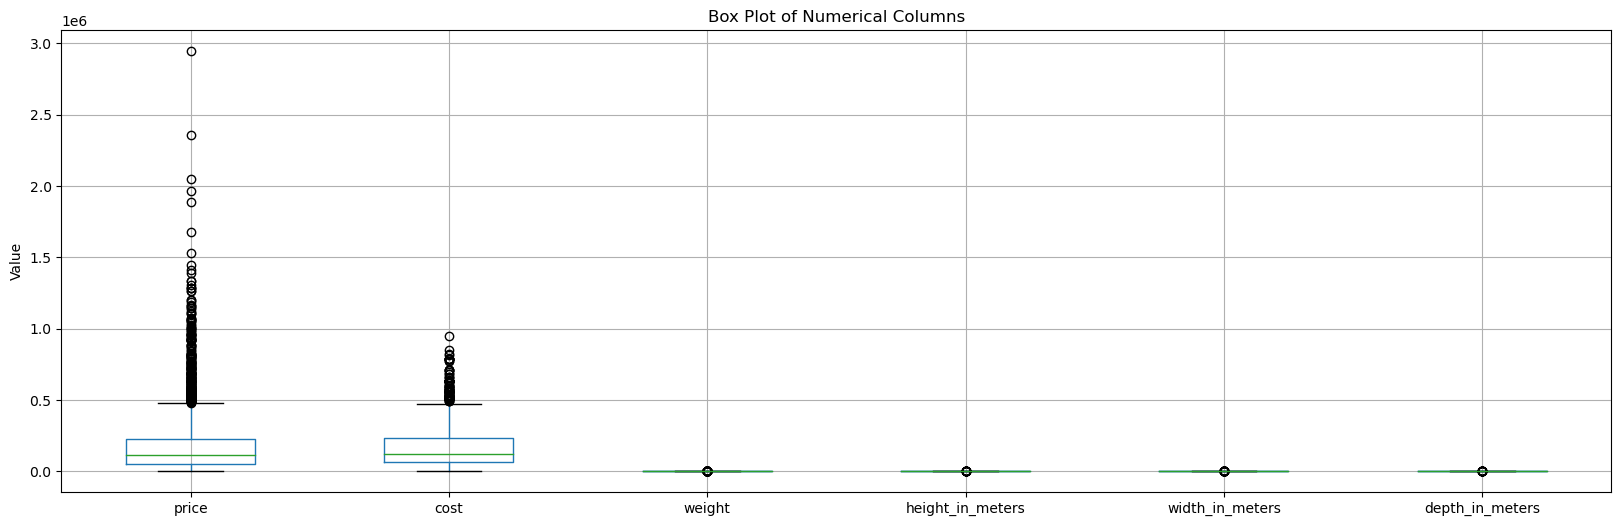

In [38]:
import matplotlib.pyplot as plt

# Select numerical columns for outlier detection
numerical_columns = ['price', 'cost', 'weight', 'height_in_meters', 'width_in_meters', 'depth_in_meters']

# Create box plots for numerical columns
plt.figure(figsize=(20, 6))
clean_data[numerical_columns].boxplot()
plt.title('Box Plot of Numerical Columns')
plt.ylabel('Value')
plt.show()

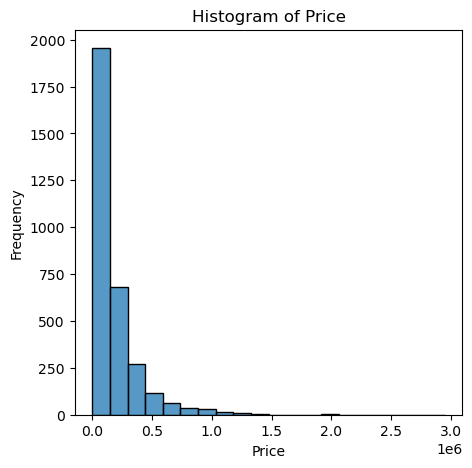

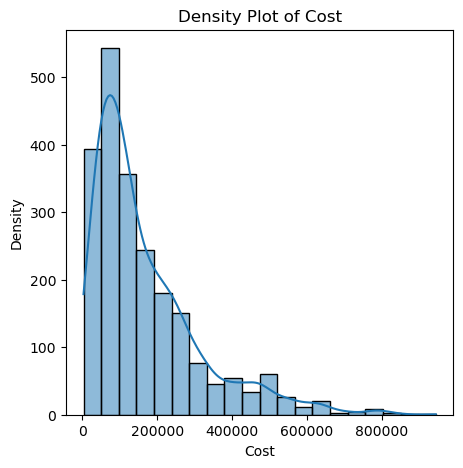

In [39]:
# To create a histogram or density plot to visualize the distribution of the 'price' and 'cost' columns
# We can also use the matplotlib.pyplot as plt to draw a histogarm or desity plot
import seaborn as sns

# Create a histogram for price
plt.figure(figsize=(5, 5))
sns.histplot(clean_data['price'], kde=False, bins=20, edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create a density plot for cost
plt.figure(figsize=(5, 5))
sns.histplot(clean_data['cost'], kde=True, bins=20, edgecolor='black')
plt.title('Density Plot of Cost')
plt.xlabel('Cost')
plt.ylabel('Density')
plt.show()

In [40]:
from scipy import stats

column = clean_data['price']  # Replace 'price' with the actual column name

z_scores = stats.zscore(column)
outliers = (z_scores > 3) | (z_scores < -3)  # Adjust the z-score threshold as needed
num_outliers = sum(outliers)
print("Number of outliers:", num_outliers)

Number of outliers: 0


2. IQR method: Calculate the interquartile range (IQR) for the column and define outliers as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles, respectively.

In [41]:
# Determine the number of rows containing outliers
column = clean_data['price']  # Replace 'price' with the actual column name

Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (column < lower_bound) | (column > upper_bound)
num_outliers = sum(outliers)
print("Number of outliers:", num_outliers)

Number of outliers: 246


In [42]:
# Determine the number of rows containing outliers
column = clean_data['cost']  

Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (column < lower_bound) | (column > upper_bound)
num_outliers = sum(outliers)
print("Number of outliers:", num_outliers)

Number of outliers: 99


**Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use**

We have identified a considerable number of outliers in the 'cost' (99 outliers) and 'price' (245 outliers) columns. Here are a few models that are known to be robust to outliers (less sensitive to outliers):

* **Random Forest**: Random Forest is an ensemble learning method that combines multiple decision trees. It is known for its robustness to outliers due to the averaging effect of multiple trees, which helps reduce the impact of individual outliers.

* **Gradient Boosting**: Gradient Boosting is another ensemble learning technique that combines multiple weak learners, usually decision trees, to create a strong predictive model. Similar to Random Forest, Gradient Boosting can handle outliers relatively well.

* **Support Vector Machines (SVM)**: SVMs are powerful and flexible models that can handle outliers effectively by using a kernel trick to map the data into a higher-dimensional space. SVMs find a decision boundary that maximizes the margin between classes, which can be less affected by individual outliers.

* **Neural Networks**: Neural networks can be relatively robust to outliers if designed properly. Adding regularization techniques, such as L1 or L2 regularization, can help mitigate the impact of outliers in the model.

It is worth noting that even though these models are generally robust to outliers, it is still advisable to preprocess your data carefully and consider the specific characteristics of your dataset. Outlier removal or transformation techniques, such as Winsorization or log-transform, could still be considered based on the nature of the outliers and their impact on the data distribution.

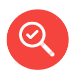
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
  * Cost and Price: The cost and price variables represent the financial aspects of the products. In general, we can expect a positive relationship between cost and price, as higher costs usually lead to higher prices. However, in the given data, some entries have missing values (NaN) for cost, which makes it difficult to assess the relationship accurately.

  * Weight and Product Type/Product Level: The weight variable indicates the weight of the products. We can examine how the weight varies across different product types and levels to understand any potential relationships. 

  * Purchase Date and Product Type/Product Level: The purchase date variable represents the date when the products were purchased. We can explore if there are any patterns or trends between the purchase date and the product type or level. 

  * Maker and Ingredient: The maker and ingredient variables describe the manufacturer and the ingredients used in the products, respectively. We can examine the relationship between different makers and the corresponding ingredients to determine if there are any consistent patterns or associations. However, in the given data, some entries have missing values (NaN) for the maker, which limits our ability to analyze this relationship comprehensively.

  * Size (Height, Width, Depth): The height, width, and depth variables represent the dimensions of the products. We can explore the relationships between these size variables to understand the product dimensions better. 

- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

## Step 2. Data Exploration (Continue EDA)

### Data visualizations
Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

### Compare the three transformation methods: Dummy, Frequency, and Ordinal Transformer, for categorical variables.

**Dummy Transformer (One-Hot Encoding):**

Each category of the categorical variable is represented by a binary column.
The binary column indicates the presence or absence of a category in each observation.
Suitable when there is no ordinal relationship or meaningful order among the categories.
**Pros**:
Preserves the distinctness of categories.
Works well for models that require numerical input.
Avoids introducing false ordinal relationships.
**Cons**:
Increases the dimensionality of the dataset.
Can be memory-intensive for large datasets.

**Frequency Transformer:**
Replaces each category with its frequency (count) in the dataset.
Suitable when the ordering or frequency of the categories conveys meaningful information.
**Pros**:
Preserves the ordinal nature of the variable.
Reduces dimensionality compared to dummy encoding.
Suitable for models that can handle ordinal variables.
**Cons**:
Ignores the distinctness of categories.
May introduce an artificial ordinal relationship.

**Ordinal Transformer:**
Assigns a numerical value to each category based on a defined order or specified mapping.
Suitable when there is a clear ordinal relationship or meaningful order among the categories.
**Pros**:
Preserves the ordinal nature of the variable.
Captures the meaningful progression of categories.
Provides flexibility to specify the mapping or order explicitly.
**Cons**:
Requires careful consideration of the assigned numerical values to reflect the true order.
May introduce a linear relationship that may not exist in reality.
The choice among these transformation methods depends on the specific characteristics of your categorical variable, the underlying relationships between categories, and the modeling techniques you plan to use. 

*It is important to consider the nature of the data, the domain knowledge, and the research objectives when selecting the appropriate transformation method.

In [43]:
# Convert 'purchase_date' column to datetime
clean_data['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Extract year, month, weekday, and weekend
clean_data['year'] = clean_data['purchase_date'].dt.year.astype('Int64')
clean_data['month'] = clean_data['purchase_date'].dt.month.astype('Int64')
clean_data['weekday'] = clean_data['purchase_date'].dt.weekday.astype('Int64')
clean_data['is_weekend'] = clean_data['weekday'].isin([5, 6])  # 5 and 6 represent Saturday and Sunday, respectively

clean_data.head()

,price,cost,weight,height_in_meters,width_in_meters,depth_in_meters,purchase_date,year,month,weekday,is_weekend
0,300492.0,333000.0,3090.0,2.76,0.97,0.26,2008-12-19,2008,12,4,False
1,430570.0,NaN,3030.0,2.67,0.98,0.26,1997-09-10,1997,9,2,False
2,213070.0,270000.0,3040.0,3.00,0.93,0.24,2001-09-05,2001,9,2,False
3,229174.0,NaN,3050.0,2.50,1.02,0.27,2016-12-23,2016,12,4,False
4,122659.0,97000.0,2970.0,2.47,1.01,0.26,2000-01-12,2000,1,2,False


In [44]:
# Check missing values again
missing_values = df.isnull().sum()

# Display missing values
print("Missing values:\n")
print(missing_values)

Missing values:

cost             980
price             10
weight             3
purchase_date      0
product_type       0
product_level      0
maker            823
ingredient       255
height             0
width              3
depth              3
dtype: int64


In [45]:
print(raw_data.shape)

(3196, 11)


In [46]:
# As product_type, product_level, maker, and ingredient all contain nan, I rename nan as unknown
unique_product_types = raw_data['product_type'].unique()
unique_product_level = raw_data['product_level'].unique()
unique_maker = raw_data['maker'].unique()
unique_ingredient = raw_data['ingredient'].unique()

print(unique_product_types)
print(unique_product_level)
print(unique_maker)
print(unique_ingredient)

['Q,B' 'J,D' 'U' 'D,R' 'H' 'S' 'B,A' 'K,D' 'N' 'U,A' 'D' 'H,A' 'G' 'D,A'
 'T,H' 'D,H' 'F' 'A' 'Q,A' 'W' 'F,D' 'R' 'P,H' 'C' 'Q,H' 'U,H' 'J' 'N,D'
 'F,H' 'Q,D' 'V,H' 'W,D' 'S,N' 'N,U' 'F,U' 'P,P' 'S,A' 'U,R' 'J,B' 'I,M'
 'B,D' 'H,M' 'S,U' 'K,H' 'S,B' 'T,D' 'F,A' 'K' 'V' 'N,A' 'B' 'R,V' 'E'
 'U,D' 'L,A' 'L' 'K,A' 'S,D' 'Q,N' 'T,A' 'O' 'B,R' 'N,L' 'K,S']
['advanced' 'basic' 'super advanced' 'intermediate' 'unrated']
['M14122' nan 'M14123' 'M14124' 'M14125' 'M14126' 'M14127' 'M14128'
 'M14129' 'M14130' 'M14131' 'M14132' 'M14133' 'M14134,M14135' 'M14136'
 'M14137' 'M14138,M14139' 'M14140' 'M14141' 'M14142' 'M14143' 'M14144'
 'M14145' 'M14146' 'M14147' 'M14148' 'M14149' 'M14150' 'M14151' 'M14152'
 'M14153' 'M14154' 'M14155' 'M14156' 'M14157' 'M14158' 'M14159' 'M14160'
 'M14161' 'M14162' 'M14163' 'M14164' 'M14165' 'M14166' 'M14167' 'M14168'
 'M14169' 'M14170' 'M14171' 'M14172' 'M14173' 'M14174' 'M14175' 'M14176'
 'M14177' 'M14178' 'M14179' 'M14180' 'M14181' 'M14182' 'M14183' 'M14184'
 'M14185

In [97]:
# rename missing values of product_type, product_level, maker, and ingredient, I rename nan as unknown
raw_data["product_type"].fillna("unknown_product_type", inplace=True)
raw_data["product_level"].fillna("unknown_product_level", inplace=True)
raw_data["maker"].fillna("unknown_maker", inplace=True)
raw_data["ingredient"].fillna("unknown_ingredient", inplace=True)
raw_data.head()
#By using the inplace=True parameter, the modifications will be made directly to the raw_data DataFrame without creating new variables.

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,height_imputed_median,width_imputed_median,depth_imputed_median,ingredient_number
0,333000.0,300492.0,3090.0,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76,0.97,0.26,2.76,0.97,0.26,2
1,NaN,430570.0,3030.0,Sep 10 1997,"J,D",basic,unknown_maker,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67,0.98,0.26,2.67,0.98,0.26,5
2,270000.0,213070.0,3040.0,Sep 05 2001,"J,D",basic,unknown_maker,"IN732054,IN732059,IN732060",3.00,0.93,0.24,3.00,0.93,0.24,3
3,NaN,229174.0,3050.0,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.50,1.02,0.27,2.50,1.02,0.27,3
4,97000.0,122659.0,2970.0,Jan 12 2000,"D,R",advanced,unknown_maker,"IN732064,IN732065,IN732066",2.47,1.01,0.26,2.47,1.01,0.26,3


In [98]:
print(raw_data.shape)

(3196, 15)


## Data Mining

There are many categories of ingredient information, but we can assume that when the number of ingredients used increases, the price decreases, create a "ingredient_number" column, and calculate the correlation coefficient.

In [99]:
# Create a new column 'ingredient_number' to represent the number of ingredients
raw_data['ingredient_number'] = raw_data['ingredient'].str.count(',') + 1

# Select the variables of interest
variables_of_interest = ['price', 'ingredient_number']

# Subset the dataset to include only the selected variables
data_subset = raw_data[variables_of_interest]

# Remove rows with missing values (NaN)
data_subset = data_subset.dropna()

# Calculate the correlation coefficient between 'price' and 'ingredient_number'
correlation_coefficient = data_subset['price'].corr(data_subset['ingredient_number'])

# Print the correlation coefficient
print(f"Correlation coefficient between price and number of ingredients: {correlation_coefficient:.2f}")

Correlation coefficient between price and number of ingredients: 0.41


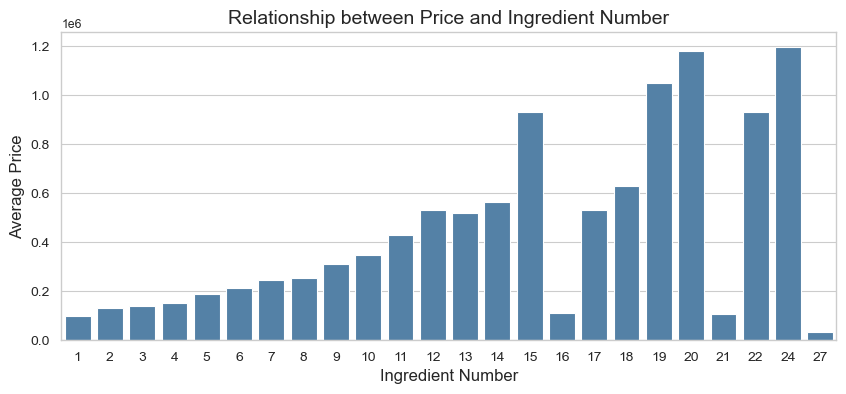

In [111]:
# Calculate the average price for each ingredient_number category
avg_price = raw_data.groupby('ingredient_number')['price'].mean()

# Set the style and context for seaborn
sns.set(style="whitegrid", context="paper")

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 4))

# Create the bar chart
sns.barplot(x=avg_price.index, y=avg_price.values, color='steelblue', ax=ax)

# Set the labels and title
ax.set_xlabel('Ingredient Number', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)
ax.set_title('Relationship between Price and Ingredient Number', fontsize=14)

# Set the tick label font size
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

In [123]:
raw_data.product_level.unique()

array(['advanced', 'basic', 'super advanced', 'intermediate', 'unrated'],
      dtype=object)

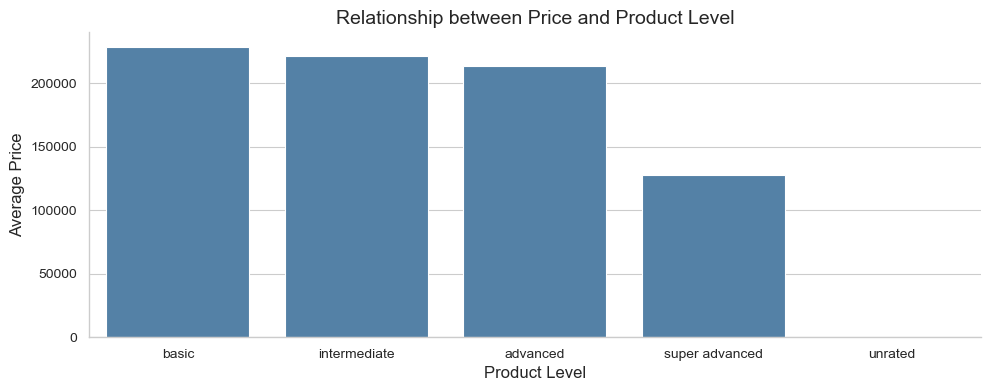

In [131]:
# Reorder the product_level categories
category_order = ['basic', 'intermediate', 'advanced', 'super advanced', 'unrated']
avg_price = avg_price.reindex(category_order)

# Set the style and context for seaborn
sns.set(style="whitegrid", context="paper")

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 4))

# Create the bar chart
sns.barplot(x=avg_price.index, y=avg_price.values, color='steelblue', ax=ax)

# Set the labels and title
ax.set_xlabel('Product Level', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)
ax.set_title('Relationship between Price and Product Level', fontsize=14)

# Set the tick label font size
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Remove the top and right spines
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()

In [132]:
# Select the variables of interest
variables_of_interest = ['price', 'cost', 'ingredient_number', 'weight', 'height', 'width', 'depth']

# Subset the dataset to include only the selected variables
data_subset = raw_data[variables_of_interest]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix.to_string(float_format="{:.3f}".format))

Correlation Matrix:
                   price  cost  ingredient_number  weight  height  width  depth
price              1.000 0.627              0.407   0.296   0.076  0.081  0.084
cost               0.627 1.000              0.379   0.358   0.075  0.122  0.120
ingredient_number  0.407 0.379              1.000   0.305   0.043  0.115  0.114
weight             0.296 0.358              0.305   1.000   0.177  0.352  0.343
height             0.076 0.075              0.043   0.177   1.000 -0.851 -0.837
width              0.081 0.122              0.115   0.352  -0.851  1.000  0.979
depth              0.084 0.120              0.114   0.343  -0.837  0.979  1.000


In [133]:
# Remove rows with missing values (NaN) for correlation_matrix
# Select the variables of interest
variables_of_interest = ['price', 'cost','ingredient_number', 'weight', 'height', 'width', 'depth']

# Subset the dataset to include only the selected variables
data_subset = raw_data[variables_of_interest]

# Remove rows with missing values (NaN)
data_subset = data_subset.dropna()

# Calculate the correlation matrix for non-null values
correlation_matrix = data_subset.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix.to_string(float_format="{:.3f}".format))

Correlation Matrix:
                   price  cost  ingredient_number  weight  height  width  depth
price              1.000 0.627              0.396   0.292   0.077  0.082  0.084
cost               0.627 1.000              0.377   0.357   0.075  0.121  0.120
ingredient_number  0.396 0.377              1.000   0.294   0.049  0.106  0.103
weight             0.292 0.357              0.294   1.000   0.181  0.361  0.349
height             0.077 0.075              0.049   0.181   1.000 -0.844 -0.832
width              0.082 0.121              0.106   0.361  -0.844  1.000  0.980
depth              0.084 0.120              0.103   0.349  -0.832  0.980  1.000


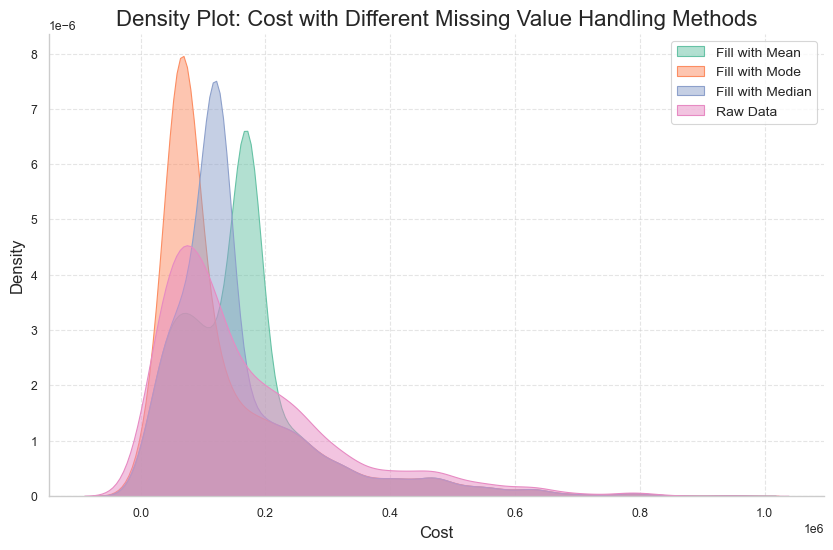

In [134]:
# Create a copy of the 'raw_data' DataFrame
data_mean = raw_data.copy()
data_mode = raw_data.copy()
data_median = raw_data.copy()

# Fill missing values in 'cost' using different methods
data_mean['cost'].fillna(data_mean['cost'].mean(), inplace=True)
data_mode['cost'].fillna(data_mode['cost'].mode()[0], inplace=True)
data_median['cost'].fillna(data_median['cost'].median(), inplace=True)

# Remove columns with all NaN values
data_mean = data_mean.dropna(axis=1, how='all')
data_mode = data_mode.dropna(axis=1, how='all')
data_median = data_median.dropna(axis=1, how='all')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set color palette for the plot
colors = sns.color_palette('Set2', 4)

# Plot the density figure for 'cost' with mean fill
if 'cost' in data_mean.columns:
    sns.kdeplot(data=data_mean, x='cost', fill=True, alpha=0.5, label='Fill with Mean', ax=ax, color=colors[0])

# Plot the density figure for 'cost' with mode fill
if 'cost' in data_mode.columns:
    sns.kdeplot(data=data_mode, x='cost', fill=True, alpha=0.5, label='Fill with Mode', ax=ax, color=colors[1])

# Plot the density figure for 'cost' with median fill
if 'cost' in data_median.columns:
    sns.kdeplot(data=data_median, x='cost', fill=True, alpha=0.5, label='Fill with Median', ax=ax, color=colors[2])

# Plot the density figure for 'cost' without filling missing values
if 'cost' in raw_data.columns:
    sns.kdeplot(data=raw_data, x='cost', fill=True, alpha=0.5, label='Raw Data', ax=ax, color=colors[3])

# Set plot title and labels
ax.set_title('Density Plot: Cost with Different Missing Value Handling Methods', fontsize=16)
ax.set_xlabel('Cost', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.legend(fontsize=10)

# Set the plot style and grid
sns.set(style='ticks')
sns.despine()
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot as a high-resolution image
plt.savefig('density_plot_journal.png', dpi=300)

# Show the plot
plt.show()

**Therefore, I decide to use the median to fill missing values in the 'cost' feature is a common approach and can provide a robust estimate.**

## Added complex variables and get the finnal clean version 2 dataset 

In [135]:
clean_data['product_level'] = raw_data['product_level'].copy()
clean_data['product_type'] = raw_data['product_type'].copy()
clean_data['maker'] = raw_data['maker'].copy()
clean_data['ingredient'] = raw_data['ingredient'].copy()
clean_data['ingredient_number'] = raw_data['ingredient_number'].copy()
clean_data['purchase_date'] = raw_data['purchase_date'].copy()

# calcluate median volume
raw_data['height_imputed_median'] = raw_data['height'].fillna(raw_data['height'].median())
raw_data['width_imputed_median'] = raw_data['width'].fillna(raw_data['width'].median())
raw_data['depth_imputed_median'] = raw_data['depth'].fillna(raw_data['depth'].median())
clean_data['volume'] = raw_data['height_imputed_median'] * raw_data['width_imputed_median'] * raw_data['depth_imputed_median']
clean_data['volume'] = clean_data['volume'].round(2)

#impute median in my price and cost
clean_data['price'] = raw_data['price'].copy()
clean_data['price'] = clean_data['price'].fillna(clean_data['price'].median())
clean_data['cost'] = raw_data['cost'].copy()
clean_data['cost'] = clean_data['cost'].fillna(clean_data['cost'].median())
clean_data.head()

,price,cost,weight,height_in_meters,width_in_meters,depth_in_meters,purchase_date,year,month,weekday,is_weekend,product_level,product_type,maker,ingredient,volume,ingredient_number
0,300492.0,333000.0,3090.0,2.76,0.97,0.26,Dec 19 2008,2008,12,4,False,advanced,"Q,B",M14122,"IN732052,IN732053",0.70,2
1,430570.0,122000.0,3030.0,2.67,0.98,0.26,Sep 10 1997,1997,9,2,False,basic,"J,D",unknown_maker,"IN732054,IN732055,IN732056,IN732057,IN732058",0.68,5
2,213070.0,270000.0,3040.0,3.00,0.93,0.24,Sep 05 2001,2001,9,2,False,basic,"J,D",unknown_maker,"IN732054,IN732059,IN732060",0.67,3
3,229174.0,122000.0,3050.0,2.50,1.02,0.27,Dec 23 2016,2016,12,4,False,advanced,U,M14123,"IN732061,IN732062,IN732063",0.69,3
4,122659.0,97000.0,2970.0,2.47,1.01,0.26,Jan 12 2000,2000,1,2,False,advanced,"D,R",unknown_maker,"IN732064,IN732065,IN732066",0.65,3


In [136]:
missing_prices = clean_data['price'].isnull().sum()
print("Number of missing values in 'price':", missing_prices)

Number of missing values in 'price': 0


In [137]:
print(clean_data.shape)

(3196, 17)


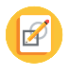
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

In [173]:
train_raw = clean_data[clean_data.year < 2015].reset_index(drop=True)
test_raw = clean_data[clean_data.year >= 2015].reset_index(drop=True)

In [174]:
print(train_raw.shape)

(2759, 17)


selected_data.drop(['year', 'purchase_date'], axis=1, inplace=True)

In [175]:
train_raw.head()

,price,cost,weight,height_in_meters,width_in_meters,depth_in_meters,purchase_date,year,month,weekday,is_weekend,product_level,product_type,maker,ingredient,volume,ingredient_number
0,300492.0,333000.0,3090.0,2.76,0.97,0.26,Dec 19 2008,2008,12,4,False,advanced,"Q,B",M14122,"IN732052,IN732053",0.70,2
1,430570.0,122000.0,3030.0,2.67,0.98,0.26,Sep 10 1997,1997,9,2,False,basic,"J,D",unknown_maker,"IN732054,IN732055,IN732056,IN732057,IN732058",0.68,5
2,213070.0,270000.0,3040.0,3.00,0.93,0.24,Sep 05 2001,2001,9,2,False,basic,"J,D",unknown_maker,"IN732054,IN732059,IN732060",0.67,3
3,122659.0,97000.0,2970.0,2.47,1.01,0.26,Jan 12 2000,2000,1,2,False,advanced,"D,R",unknown_maker,"IN732064,IN732065,IN732066",0.65,3
4,60320.0,59000.0,2930.0,2.71,0.96,0.25,Aug 19 2011,2011,8,4,False,super advanced,H,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",0.65,6


**Scalers can be used to preprocess numerical features.**
1. StandardScaler: Scales features to have zero mean and unit variance. It is a popular choice when working with algorithms that assume normally distributed features.
2. MinMaxScaler: Scales features to a specified range, usually between 0 and 1. It is useful when the distribution of the features is not necessarily Gaussian and you want to preserve the relative relationships between the values.
3. RobustScaler: Scales features using statistics that are robust to outliers, such as the median and interquartile range. It is suitable when the presence of outliers may significantly affect the mean and variance estimates.
4. MaxAbsScaler: Scales features to the range [-1, 1] by dividing through the maximum absolute value. It is useful when the data is already centered at zero and sparse, and you want to preserve the sparsity of the data.

## PCA

In [176]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['price', 'cost', 'weight', 'height_in_meters', 'width_in_meters', 'depth_in_meters', 'ingredient_number']
categorical_columns = ['product_type', 'product_level', 'maker', 'ingredient']
target_variable = 'price'  

# Apply feature scaling to numerical features
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(train_raw[numerical_columns])

# Apply TargetEncoder to categorical features
encoder = TargetEncoder(cols=categorical_columns)
encoded_categorical = encoder.fit_transform(train_raw[categorical_columns], train_raw[target_variable])

# Apply missing data imputation to numerical features
imputer = SimpleImputer(strategy='median')
imputed_numerical = imputer.fit_transform(scaled_numerical)

# Combine imputed numerical and encoded categorical features
combined_data = pd.concat([pd.DataFrame(imputed_numerical, columns=numerical_columns),
                           encoded_categorical], axis=1)


# the target variable (price) should not be included when performing PCA
# PCA is an unsupervised dimensionality reduction technique that focuses solely on the input features to identify the key components that capture the most variance in the data.
combined_data_withoutprice = combined_data.drop(columns=['price']).copy()


# Apply PCA on the combined data
n_components = 3  # Specify the desired number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(combined_data_withoutprice)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Access the principal components (eigenvectors)
principal_components = pca.components_

In [177]:
combined_data_withoutprice

,cost,weight,height_in_meters,width_in_meters,depth_in_meters,ingredient_number,product_type,product_level,maker,ingredient
0,0.350318,0.308725,0.588889,0.304348,0.333333,0.038462,310184.130700,206426.050922,243788.697862,193774.128550
1,0.126327,0.268456,0.538889,0.326087,0.333333,0.153846,181052.764051,228658.127968,94093.377822,210698.378678
2,0.283439,0.275168,0.722222,0.217391,0.166667,0.076923,181052.764051,228658.127968,94093.377822,182399.785504
3,0.099788,0.228188,0.427778,0.391304,0.333333,0.076923,144384.009047,206426.050922,94093.377822,170636.548229
4,0.059448,0.201342,0.561111,0.282609,0.250000,0.192308,115436.800113,127001.286870,174396.879003,162525.716045
...,...,...,...,...,...,...,...,...,...,...
2754,0.266454,0.275168,0.177778,0.652174,0.666667,0.461538,141380.724221,211749.684783,197942.221592,187878.523251
2755,0.093418,0.174497,0.455556,0.347826,0.333333,0.269231,141380.724221,206426.050922,184571.100868,173495.291627
2756,0.126327,0.134228,0.250000,0.500000,0.500000,0.192308,180708.352878,211749.684783,168556.181096,159931.873500
2757,0.043524,0.214765,0.455556,0.369565,0.333333,0.000000,209782.380879,206426.050922,159371.086942,171985.457189


In [178]:
explained_variance_ratio = pca.explained_variance_ratio_

# Access the principal components (eigenvectors)
principal_components = pca.components_

In [179]:
explained_variance_ratio

array([0.55269597, 0.24464491, 0.1359572 ])

This means that:
* Component 1 explains approximately 55.27% of the total variance in the data.
* Component 2 explains approximately 24.46% of the total variance.
* Component 3 explains approximately 13.60% of the total variance.

In [180]:
# Print the coefficients of each component
for i, component in enumerate(pca.components_):
    print(f"Component {i+1} Coefficients:")
    for j, feature_name in enumerate(combined_data_withoutprice.columns):
        print(f"{feature_name}: {component[j]}")
    print()

Component 1 Coefficients:
cost: 9.291689962203716e-07
weight: 2.0854200533104716e-07
height_in_meters: 6.78255743360053e-08
width_in_meters: 5.511504819894037e-08
depth_in_meters: 6.460454638442218e-08
ingredient_number: 4.154788373059562e-07
product_type: 0.9213079737862011
product_level: 0.1897511724082781
maker: 0.2617146922835058
ingredient: 0.21608222936999225

Component 2 Coefficients:
cost: 6.573978236198232e-07
weight: 8.574302640118603e-07
height_in_meters: 2.3755585126061023e-07
width_in_meters: 2.6989981347502207e-07
depth_in_meters: 2.7269755431983283e-07
ingredient_number: 9.300773129384819e-07
product_type: -0.3160921240015655
product_level: -0.12374034974547916
maker: 0.8156791046453002
ingredient: 0.4684460408967619

Component 3 Coefficients:
cost: -1.9506176714231192e-07
weight: 3.897842977343413e-07
height_in_meters: 5.5587615584232393e-08
width_in_meters: 1.586777668786997e-07
depth_in_meters: 1.553774519975203e-07
ingredient_number: 4.7692543278679675e-08
product_ty

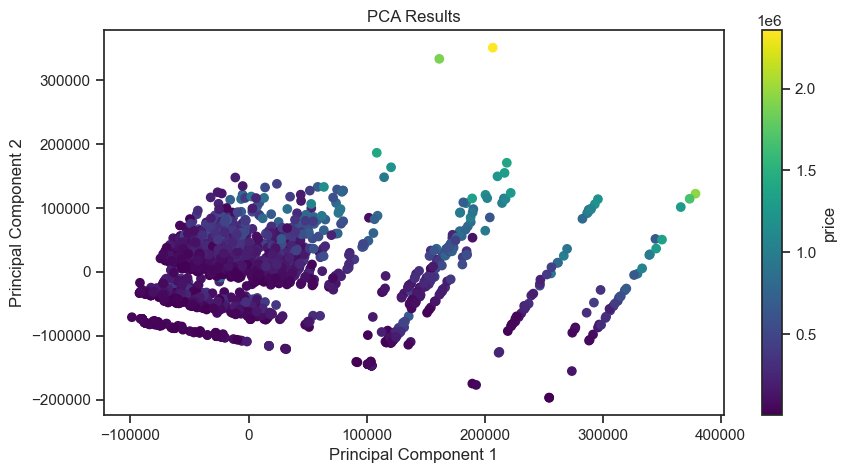

In [181]:
# Plotting the PCA results by create a scatter plot of the principal components
plt.figure(figsize=(10, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=train_raw[target_variable], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.colorbar(label=target_variable)
plt.show()

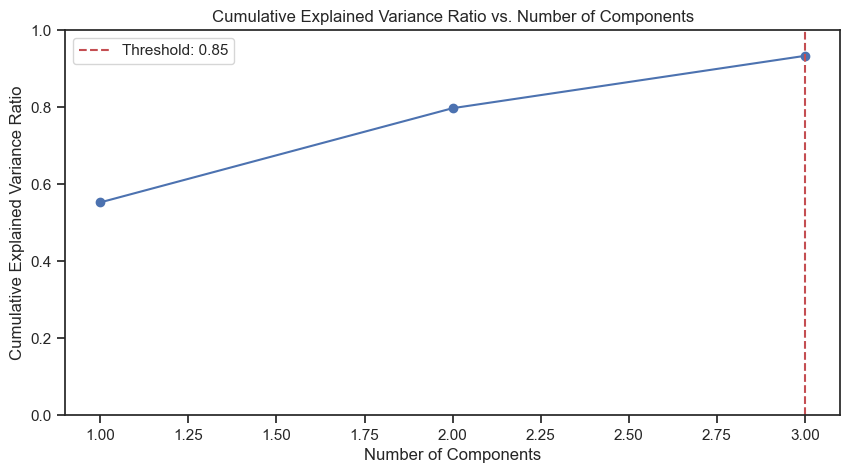

Number of Components satisfying the threshold: 3


In [182]:
# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 5))

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.ylim(0, 1)  # Set y-axis limits to 0% to 100%

# Find the number of components that satisfy the threshold
threshold = 0.85
n_components_threshold = np.argmax(cumulative_variance_ratio >= threshold) + 1
plt.axvline(x=n_components_threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')

plt.legend()
plt.show()

print("Number of Components satisfying the threshold:", n_components_threshold)

* 1. Plot the cumulative explained variance ratio as a function of the number of components and visually inspect the plot to identify the "elbow" point. The elbow point is the number of components where the incremental gain in explained variance starts to diminish significantly.
* 2. Another approach is to set a threshold for the cumulative explained variance ratio.

### Scale the numerical features and Encode the categorical features

In [183]:
numerical_columns

['price',
 'cost',
 'weight',
 'height_in_meters',
 'width_in_meters',
 'depth_in_meters',
 'ingredient_number']

In [184]:
categorical_columns

['product_type', 'product_level', 'maker', 'ingredient']

### Perform dimensionality reduction
* Use the three components obtained from PCA to reduce the dimensionality of the combined numerical and encoded categorical features. Transform the data using only the three principal components obtained from PCA.

In [185]:
# Apply PCA with three components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(combined_data_withoutprice)

#Fit the PCA model to the combined data:
pca.fit(combined_data_withoutprice)

#Transform the combined data using the fitted PCA model:
pca_data = pca.transform(combined_data_withoutprice)

# Create a new DataFrame with the transformed data from PCA:
pca_df = pd.DataFrame(pca_data, columns=[f"Component {i+1}" for i in range(n_components)])

In [186]:
pca_df

,Component 1,Component 2,Component 3
0,154422.532204,33232.254700,327.222075
1,4150.902206,-42876.588981,-53749.122937
2,-1963.920895,-56132.952916,-50315.329603
3,-42507.526489,-47301.685204,-35634.003355
4,-64983.763595,33378.748353,36443.662872
...,...,...,...
2754,-13359.858387,45773.148003,-42498.829840
2755,-20977.403654,28787.584628,-35741.786553
2756,9143.466558,-3719.082305,-30567.350938
2757,35120.125763,-14096.041072,-20442.736638


1. When performing dimensionality reduction, it is generally recommended to only use the training dataset for fitting the PCA model and transforming the data. This is to avoid data leakage and ensure that the dimensionality reduction is based solely on the information contained in the training dataset.

2. The steps for dimensionality reduction should be applied separately to the training and test datasets. **This means that you will fit the PCA model using the training dataset and transform both the training and test datasets using the same PCA model.**

In [187]:
numerical_columns = ['cost', 'weight', 'height_in_meters', 'width_in_meters', 'depth_in_meters', 'ingredient_number']
categorical_columns = ['product_type', 'product_level', 'maker', 'ingredient']
target_variable = 'price' 

# Apply feature scaling to numerical features
scaler = StandardScaler()
scaled_numerical_train = scaler.fit_transform(train_raw[numerical_columns])
scaled_numerical_test = scaler.transform(test_raw[numerical_columns])  # Use transform on test data

# Apply TargetEncoder to categorical features
encoder = TargetEncoder(cols=categorical_columns)
encoded_categorical_train = encoder.fit_transform(train_raw[categorical_columns], train_raw[target_variable])
encoded_categorical_test = encoder.transform(test_raw[categorical_columns])  # Use transform on test data

# Apply missing data imputation to numerical features
imputer = SimpleImputer(strategy='median')
imputed_numerical_train = imputer.fit_transform(scaled_numerical_train)
imputed_numerical_test = imputer.transform(scaled_numerical_test)  # Use transform on test data

# Combine imputed numerical and encoded categorical features
X_train = pd.concat([pd.DataFrame(imputed_numerical_train, columns=numerical_columns),
                                 encoded_categorical_train], axis=1)
X_test = pd.concat([pd.DataFrame(imputed_numerical_test, columns=numerical_columns),
                                encoded_categorical_test], axis=1)

In [188]:
X_train

,cost,weight,height_in_meters,width_in_meters,depth_in_meters,ingredient_number,product_type,product_level,maker,ingredient
0,1.527190,0.121007,0.478447,-0.502640,-0.106116,-0.755752,310184.130700,206426.050922,243788.697862,193774.128550
1,-0.260406,-0.210405,0.144664,-0.321403,-0.106116,0.234020,181052.764051,228658.127968,94093.377822,210698.378678
2,0.993453,-0.155169,1.368537,-1.227589,-1.457926,-0.425828,181052.764051,228658.127968,94093.377822,182399.785504
3,-0.472207,-0.541816,-0.597078,0.222308,-0.106116,-0.425828,144384.009047,206426.050922,94093.377822,170636.548229
4,-0.794144,-0.762757,0.293012,-0.683878,-0.782021,0.563944,115436.800113,127001.286870,174396.879003,162525.716045
...,...,...,...,...,...,...,...,...,...,...
2754,0.857901,-0.155169,-2.265996,2.397153,2.597505,2.873410,141380.724221,211749.684783,197942.221592,187878.523251
2755,-0.523039,-0.983698,-0.411642,-0.140166,-0.106116,1.223791,141380.724221,206426.050922,184571.100868,173495.291627
2756,-0.260406,-1.315110,-1.783864,1.128493,1.245695,0.563944,180708.352878,211749.684783,168556.181096,159931.873500
2757,-0.921224,-0.652287,-0.411642,0.041071,-0.106116,-1.085675,209782.380879,206426.050922,159371.086942,171985.457189


In [189]:
X_test

,cost,weight,height_in_meters,width_in_meters,depth_in_meters,ingredient_number,product_type,product_level,maker,ingredient
0,-0.260406,-0.099934,-0.485816,0.403545,0.569790,-0.425828,130931.755284,206426.050922,177812.483871,177812.483871
1,0.061530,2.054241,1.034753,0.041071,-0.106116,0.234020,115436.800113,127001.286870,293811.382689,177812.483871
2,0.061530,0.286713,1.108928,-0.865115,-0.782021,0.893868,166636.022311,127001.286870,235053.889622,177812.483871
3,-0.260406,-0.486581,-1.820951,1.672204,1.245695,-1.085675,150856.405574,206426.050922,94093.377822,82589.443378
4,-1.141497,0.783830,-0.189120,0.584782,0.569790,-0.755752,115436.800113,206426.050922,177812.483871,177812.483871
...,...,...,...,...,...,...,...,...,...,...
432,-0.980528,0.121007,0.775144,-0.683878,-0.782021,0.234020,115436.800113,206426.050922,94093.377822,177812.483871
433,-0.260406,0.894300,-1.635516,2.215916,1.921600,-0.425828,115436.800113,211749.684783,177812.483871,177812.483871
434,3.467283,1.999005,-0.522903,1.490967,1.245695,2.873410,487598.457603,206426.050922,211452.537833,177812.483871
435,-0.260406,-0.376110,-2.265996,2.215916,1.921600,0.234020,141380.724221,206426.050922,184571.100868,177812.483871


In [190]:
# Fit PCA on the training dataset
pca.fit(X_train)

# Transform the training and test datasets using the fitted PCA model
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [191]:
X_train_pca

array([[154422.53220924,  33232.25467665,    327.2220712 ],
       [  4150.90220204, -42876.58897974, -53749.12293474],
       [ -1963.9208934 , -56132.95291522, -50315.32960504],
       ...,
       [  9143.46655535,  -3719.08231139, -30567.3509387 ],
       [ 35120.12574924, -14096.04109547, -20442.73663848],
       [-90127.52995525, -74079.11848307,  48538.29915814]])

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forests regressor
rf = RandomForestRegressor()

# Fit the model on the transformed training data
rf.fit(X_train_pca, y_train)

# Make predictions on the transformed test data
y_pred = rf.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 73830665369.5211
R-squared Score: 0.1295005195260367


In [193]:
from tabulate import tabulate
# Calculate evaluation metrics
metrics_data = {'Metric': ['MSE', 'R2 Score'],
                'Value': [mse, r2]}
metrics_df = pd.DataFrame(metrics_data)

# Print the table
print(tabulate(metrics_df, headers='keys', tablefmt='psql'))

+----+----------+-------------+
|    | Metric   |       Value |
|----+----------+-------------|
|  0 | MSE      | 7.38307e+10 |
|  1 | R2 Score | 0.129501    |
+----+----------+-------------+


Alternatively, you can explore other dimensionality reduction techniques that are specifically designed for categorical data, such as Multiple Correspondence Analysis (MCA) or CatPCA, which can capture the relationships and patterns within categorical features more effectively.

Overall, while PCA can be applied to a combined dataset of numerical and categorical features, it is crucial to handle the categorical features appropriately to ensure accurate representation and optimal performance of the model.

# Feature Engineering 
numerical_columns = ['cost', 'weight', 'height_in_meters', 'width_in_meters', 'depth_in_meters', 'volume']

categorical_columns = ['product_type', 'product_level', 'maker', 'ingredient']

target_variable = 'price' 

Improving model performance can be achieved through various approaches.

* Feature Engineering: Consider creating new features or transforming existing ones to capture more relevant information for the target variable. This can involve techniques such as one-hot encoding, binning, interaction terms, polynomial features, or feature scaling.

* Feature Selection: Identify the most informative features that contribute significantly to the target variable and remove irrelevant or redundant features. This can be done through techniques like statistical tests, correlation analysis, or model-based feature selection.

* Hyperparameter Tuning: Experiment with different combinations of hyperparameters for your model. Hyperparameters control the behavior of the model and optimizing them can improve its performance. Techniques like grid search, random search, or Bayesian optimization can be used for hyperparameter tuning.

* Ensemble Methods: Explore ensemble techniques like bagging, boosting, or stacking. Ensemble models combine multiple individual models to make predictions, often leading to improved performance.

* Data Augmentation: If you have limited training data, consider augmenting your dataset by generating additional synthetic data or applying techniques like oversampling or undersampling to balance the classes.

* Cross-Validation: Ensure that you are using appropriate cross-validation techniques to evaluate your model's performance and generalize well to unseen data. This helps in estimating the model's performance on different data samples.

* Regularization: Regularization techniques like L1 or L2 regularization can help prevent overfitting by adding a penalty term to the loss function. This encourages the model to generalize better to unseen data.

* Model Selection: Experiment with different algorithms or models to find the one that best fits your data. Different models have different strengths and weaknesses, and some may perform better than others depending on your specific dataset.

* Data Preprocessing: Ensure that your data is preprocessed appropriately. This may involve handling missing values, outliers, or skewed distributions. Scaling or normalizing the features can also be beneficial for some models.

* More Data: If possible, consider acquiring more data to improve the model's performance. More data can help the model learn better patterns and generalize well.

Remember that improving model performance is an iterative process. It may require trying multiple approaches and fine-tuning various aspects of the model. Additionally, the specific techniques that work best can depend on your dataset and the problem you are trying to solve.

In [195]:
# Define train set
features = list(train_raw.columns)
target = 'price'
features.remove(target)

X_train = train_raw[features]
y_train = train_raw[target]

# Define test set
features_test = list(test_raw.columns)
target_test = 'price'
features_test.remove(target_test)

X_test = test_raw[features_test]
y_test = test_raw[target_test]
X_train.describe()

,cost,weight,height_in_meters,width_in_meters,depth_in_meters,year,month,weekday,volume,ingredient_number
count,2759.000000,2758.000000,2758.000000,2758.000000,2758.000000,2759.000000,2759.000000,2759.000000,2759.00000,2759.000000
mean,152737.223632,3068.092458,2.630993,0.997734,0.261570,2005.464661,6.654947,3.788692,0.68207,4.290685
std,118056.967614,181.076643,0.269685,0.055186,0.014798,5.185056,3.409426,0.651825,0.04106,3.031552
min,3000.000000,2630.000000,1.700000,0.830000,0.220000,1996.000000,1.000000,0.000000,0.59000,1.000000
25%,88000.000000,2940.000000,2.450000,0.960000,0.250000,2001.000000,4.000000,4.000000,0.65000,2.000000
50%,122000.000000,3040.000000,2.620000,0.990000,0.260000,2006.000000,7.000000,4.000000,0.68000,4.000000
75%,176000.000000,3160.000000,2.820000,1.030000,0.270000,2010.000000,10.000000,4.000000,0.70000,6.000000
max,945000.000000,4120.000000,3.500000,1.290000,0.340000,2014.000000,12.000000,6.000000,0.92000,27.000000


### deal with outliers in cost feature

In [196]:
# Display the descriptive statistics of the "cost" feature
print(X_train['cost'].describe())

count      2759.000000
mean     152737.223632
std      118056.967614
min        3000.000000
25%       88000.000000
50%      122000.000000
75%      176000.000000
max      945000.000000
Name: cost, dtype: float64


However, the log-transformed "cost" feature is still right-skewed and does not follow a normal distribution. I tried other transformations to address the skewness. Some common transformations to consider are square root transformation, inverse transformation, or Box-Cox transformation.
Winsorization is a technique used to limit the impact of outliers by replacing extreme values with values at a specified percentile. However, winsorized_cost is not good in this case as it changed the outliers to 34000.0.

Therefore, I decided to impute outliers by the median of cost.

In [199]:
# Calculate the interquartile range (IQR)
Q1 = np.nanpercentile(X_train['cost'], 25)
Q3 = np.nanpercentile(X_train['cost'], 75)
IQR = Q3 - Q1

if np.isnan(IQR):
    print("No outliers found in the 'cost' column.")
else:
    # Define the lower and upper limits for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Count the number of outliers before imputation
    outliers_before = X_train[(X_train['cost'] < lower_limit) | (X_train['cost'] > upper_limit)].shape[0]

    # Compute the median of the non-outlier values
    median_value = np.nanmedian(X_train['cost'])

    # Replace the outlier values with the median
    X_train.loc[X_train['cost'] > upper_limit, 'cost'] = median_value
    X_train.loc[X_train['cost'] < lower_limit, 'cost'] = median_value

    # Count the number of outliers after imputation
    outliers_after = X_train[(X_train['cost'] < lower_limit) | (X_train['cost'] > upper_limit)].shape[0]

    # Calculate the number of imputed outliers
    imputed_outliers = outliers_before - outliers_after

    print("Number of imputed outliers:", imputed_outliers)

Number of imputed outliers: 611


In [238]:
X_train.describe()

,cost,weight,height_in_meters,width_in_meters,depth_in_meters,year,month,weekday,volume,ingredient_number
count,2759.000000,2758.000000,2758.000000,2758.000000,2758.000000,2759.000000,2759.000000,2759.000000,2759.00000,2759.000000
mean,111057.992026,3068.092458,2.630993,0.997734,0.261570,2005.464661,6.654947,3.788692,0.68207,4.290685
std,26218.504509,181.076643,0.269685,0.055186,0.014798,5.185056,3.409426,0.651825,0.04106,3.031552
min,37000.000000,2630.000000,1.700000,0.830000,0.220000,1996.000000,1.000000,0.000000,0.59000,1.000000
25%,113000.000000,2940.000000,2.450000,0.960000,0.250000,2001.000000,4.000000,4.000000,0.65000,2.000000
50%,122000.000000,3040.000000,2.620000,0.990000,0.260000,2006.000000,7.000000,4.000000,0.68000,4.000000
75%,122000.000000,3160.000000,2.820000,1.030000,0.270000,2010.000000,10.000000,4.000000,0.70000,6.000000
max,172000.000000,4120.000000,3.500000,1.290000,0.340000,2014.000000,12.000000,6.000000,0.92000,27.000000


In [201]:
X_train

,cost,weight,height_in_meters,width_in_meters,depth_in_meters,purchase_date,year,month,weekday,is_weekend,product_level,product_type,maker,ingredient,volume,ingredient_number
0,122000.0,3090.0,2.76,0.97,0.26,Dec 19 2008,2008,12,4,False,advanced,"Q,B",M14122,"IN732052,IN732053",0.70,2
1,122000.0,3030.0,2.67,0.98,0.26,Sep 10 1997,1997,9,2,False,basic,"J,D",unknown_maker,"IN732054,IN732055,IN732056,IN732057,IN732058",0.68,5
2,122000.0,3040.0,3.00,0.93,0.24,Sep 05 2001,2001,9,2,False,basic,"J,D",unknown_maker,"IN732054,IN732059,IN732060",0.67,3
3,97000.0,2970.0,2.47,1.01,0.26,Jan 12 2000,2000,1,2,False,advanced,"D,R",unknown_maker,"IN732064,IN732065,IN732066",0.65,3
4,59000.0,2930.0,2.71,0.96,0.25,Aug 19 2011,2011,8,4,False,super advanced,H,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",0.65,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,122000.0,3040.0,2.02,1.13,0.30,Apr 20 2012,2012,4,4,False,intermediate,D,M14261,"IN732220,IN732456,IN733681,IN732831,IN733123,I...",0.68,13
2755,91000.0,2890.0,2.52,0.99,0.26,Jul 12 2002,2002,7,4,False,advanced,D,M14904,"IN732503,IN732583,IN732373,IN732338,IN732347,I...",0.65,8
2756,122000.0,2830.0,2.15,1.06,0.28,May 25 2007,2007,5,4,False,intermediate,"J,B",M14578,"IN732832,IN732166,IN733162,IN733785,IN732069,I...",0.64,6
2757,44000.0,2950.0,2.52,1.00,0.26,Apr 12 2002,2002,4,4,False,advanced,R,M14341,IN732587,0.66,1


### To explore the time series relationships and predict the price

In [ ]:
# Resample the data to a specific frequency, such as monthly, and calculate the mean price for each period:
raw_data['purchase_date'] = pd.to_datetime(raw_data['purchase_date'])
raw_data.set_index('purchase_date', inplace=True)
raw_data.sort_index(inplace=True)
monthly_avg_price = raw_data['price'].resample('M').mean()

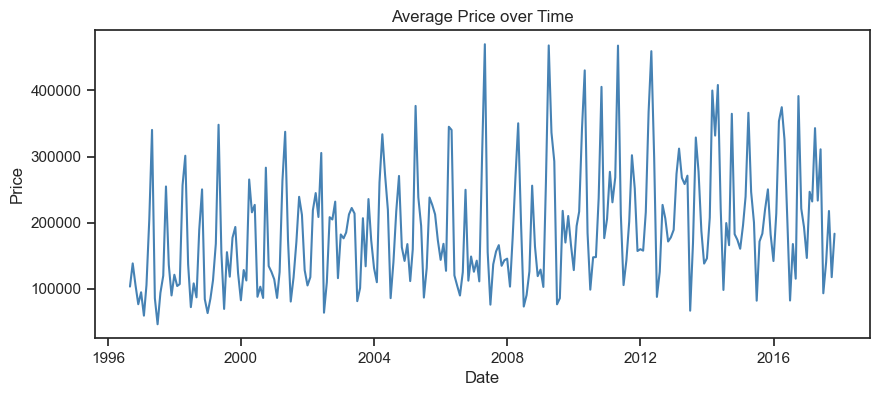

In [233]:
plt.figure(figsize=(10, 4))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, color='steelblue')
plt.title('Average Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [237]:
raw_data

,cost,price,weight,product_type,product_level,maker,ingredient,height,width,depth,height_imputed_median,width_imputed_median,depth_imputed_median,ingredient_number
purchase_date,,,,,,,,,,,,,,
1996-08-09,NaN,103343.0,3120.0,H,super advanced,unknown_maker,IN732231,2.93,0.95,0.25,2.93,0.95,0.25,1
1996-09-27,NaN,138381.0,3350.0,"Q,D",intermediate,M14325,"IN732384,IN732473,IN732486,IN732403,IN732653,I...",2.62,1.04,0.27,2.62,1.04,0.27,7
1996-10-04,141000.0,45701.0,4120.0,"U,H",super advanced,M14211,"IN732457,IN733129,IN733350,IN732260,IN733192,I...",3.07,1.07,0.28,3.07,1.07,0.28,12
1996-10-11,NaN,262119.0,3430.0,"P,H",intermediate,unknown_maker,"IN733593,IN732277,IN732595,IN732642",2.72,1.03,0.27,2.72,1.03,0.27,4
1996-10-11,NaN,126383.0,3220.0,H,super advanced,M14454,"IN732591,IN732485,IN732464,IN732576",2.58,1.03,0.27,2.58,1.03,0.27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-29,116000.0,100158.0,2940.0,H,advanced,M14416,"IN732440,IN732650,IN732847,IN732188,IN732142,I...",1.95,1.13,0.30,1.95,1.13,0.30,8
2017-10-04,238000.0,NaN,3100.0,C,intermediate,M14849,"IN732368,IN732551,IN732324,IN732692,IN732249,I...",2.59,1.01,0.26,2.59,1.01,0.26,6
2017-10-04,348000.0,NaN,3160.0,S,advanced,M14793,"IN732536,IN732919,IN732430,IN732119",3.26,0.91,0.24,3.26,0.91,0.24,4


### 1. Random Forests
* Random Forest: Random Forest is an ensemble learning method that combines multiple decision trees. It is known for its robustness to outliers due to the averaging effect of multiple trees, which helps reduce the impact of individual outliers.

In [217]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from category_encoders import TargetEncoder
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error



# Prepare the feature columns
numerical_columns = ['cost', 'weight','volume', 'ingredient_number']
categorical_columns = ['product_type', 'product_level']
target_variable = 'price' 

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=20)),  # Use IterativeImputer for MICE imputation
    ('scaler', RobustScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder()),
    ('knn_imputer', KNNImputer(n_neighbors=25))
])

# Create a ColumnTransformer to apply the transformers to specific columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Create the xgboost pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=2, min_samples_leaf=4, random_state=42))
])

# Fit the pipeline to the training data
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
rf_y_train_pred = rf_pipeline.predict(X_train)
rf_y_test_pred = rf_pipeline.predict(X_test)

# Evaluate the model on the training set
rf_train_mae = mean_absolute_error(y_train, rf_y_train_pred)
rf_train_mse = mean_squared_error(y_train, rf_y_train_pred)
rf_train_r2 = r2_score(y_train, rf_y_train_pred)

# Calculate and print evaluation metrics on the testing set
rf_test_mae = mean_absolute_error(y_test, rf_y_test_pred)
rf_test_mse = mean_squared_error(y_test, rf_y_test_pred)
rf_test_r2 = r2_score(y_test, rf_y_test_pred)

# Define the evaluation metrics
rf_metrics = [["Train R2", rf_train_r2], ["Train MSE", rf_train_mse], ["Train MAE", rf_train_mae],
               ["Test R2", rf_test_r2], ["Test MSE", rf_test_mse], ["Test MAE", rf_test_mae]]

# Print the metrics in a table with two decimals
print(tabulate(rf_metrics, headers=["Metric", "Value"], tablefmt="fancy_grid", floatfmt=".2f"))

╒═══════════╤════════════════╕
│ Metric    │          Value │
╞═══════════╪════════════════╡
│ Train R2  │           0.48 │
├───────────┼────────────────┤
│ Train MSE │ 22106628090.12 │
├───────────┼────────────────┤
│ Train MAE │      101196.25 │
├───────────┼────────────────┤
│ Test R2   │           0.41 │
├───────────┼────────────────┤
│ Test MSE  │ 49817088221.64 │
├───────────┼────────────────┤
│ Test MAE  │      129146.22 │
╘═══════════╧════════════════╛


**Performing hyperparameter tuning on the random forest model**

In [1138]:
import time
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search over
param_grid = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 5, 8],
    'random_forest__min_samples_split': [2, 5, 7],
    'random_forest__min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object using the random forest pipeline (rf_pipeline)
grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=5, scoring='r2')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'random_forest__max_depth': 5, 'random_forest__min_samples_leaf': 2, 'random_forest__min_samples_split': 7, 'random_forest__n_estimators': 100}
Best Score: 0.3161788352836156
Running Time: 174.73616242408752 seconds


In [1193]:
from sklearn.model_selection import GridSearchCV, KFold

# Define the parameter grid to search over
param_grid = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 5, 8],
    'random_forest__min_samples_split': [2, 5, 7],
    'random_forest__min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object using the random forest pipeline (rf_pipeline)
grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=KFold(n_splits=5), scoring='r2')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'random_forest__max_depth': 5, 'random_forest__min_samples_leaf': 4, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 50}
Best Score: 0.3681359500598618
Running Time: 131.92030382156372 seconds


* In summary, k-fold cross-validation is a technique for evaluating a model's performance, while GridSearchCV is a tool for finding the best set of hyperparameters for a model using cross-validation. They can be used together, where k-fold cross-validation is performed within GridSearchCV to evaluate the performance of different hyperparameter combinations.

### 2. XGBoost 

In [218]:
from sklearn.impute import IterativeImputer
import xgboost as xgb
from sklearn.model_selection import KFold


# Prepare the feature columns
numerical_columns = ['cost', 'weight', 'volume', 'ingredient_number']
categorical_columns = ['product_type', 'product_level']
target_variable = 'price' 


# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10)),  
    ('scaler', MinMaxScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder()),
    ('knn_imputer', KNNImputer(n_neighbors=10))
])

# Create a ColumnTransformer to apply the transformers to specific columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Create the xgboost pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(max_depth=5, n_estimators=30, colsample_bytree=0.6, learning_rate=0.05, subsample=1.0, random_state=42))
])


# Fit the pipeline to the training data
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_train_pred = xgb_pipeline.predict(X_train)
xgb_y_test_pred = xgb_pipeline.predict(X_test)

# Evaluate the model on the training set
xgb_train_mae = mean_absolute_error(y_train, xgb_y_train_pred)
xgb_train_mse = mean_squared_error(y_train, xgb_y_train_pred)
xgb_train_r2 = r2_score(y_train, xgb_y_train_pred)

# Calculate and print evaluation metrics on the testing set
xgb_test_mae = mean_absolute_error(y_test, xgb_y_test_pred)
xgb_test_mse = mean_squared_error(y_test, xgb_y_test_pred)
xgb_test_r2 = r2_score(y_test, xgb_y_test_pred)

# Define the evaluation metrics
xgb_metrics = [["Train R2", xgb_train_r2], ["Train MSE", xgb_train_mse], ["Train MAE", xgb_train_mae],
               ["Test R2", xgb_test_r2], ["Test MSE", xgb_test_mse], ["Test MAE", xgb_test_mae]]

# Print the metrics in a table with two decimals
print(tabulate(xgb_metrics, headers=["Metric", "Value"], tablefmt="fancy_grid", floatfmt=".2f"))

╒═══════════╤════════════════╕
│ Metric    │          Value │
╞═══════════╪════════════════╡
│ Train R2  │           0.40 │
├───────────┼────────────────┤
│ Train MSE │ 25674289784.82 │
├───────────┼────────────────┤
│ Train MAE │       98367.75 │
├───────────┼────────────────┤
│ Test R2   │           0.28 │
├───────────┼────────────────┤
│ Test MSE  │ 60878797465.37 │
├───────────┼────────────────┤
│ Test MAE  │      128446.48 │
╘═══════════╧════════════════╛


In [1186]:
pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Fit the XGBoost model on your training data
xgb_pipeline.fit(X_train, y_train)

# Get the trained booster from the pipeline
booster = xgb_pipeline.named_steps['regressor']

# Specify the index of the tree you want to visualize
tree_index = 3

# Plot the specified decision tree
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(booster, num_trees=tree_index, ax=ax)
plt.show()

In [1152]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'regressor__max_depth': [3, 5, 7],
    'regressor__n_estimators': [30, 50, 100],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__subsample': [0.8, 1.0]
}

# Create the GridSearchCV object using the random forest pipeline (rf_pipeline)
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'regressor__colsample_bytree': 0.6, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 7, 'regressor__n_estimators': 30, 'regressor__subsample': 1.0}
Best Score: -103739.31509761412
Running Time: 60.40865421295166 seconds


In [1195]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Define the parameter grid to search over
param_grid = {
    'regressor__max_depth': [3, 5, 7],
    'regressor__n_estimators': [30, 50, 100],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__subsample': [0.8, 1.0]
}

# Create the GridSearchCV object using the random forest pipeline (rf_pipeline)
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, cv=KFold(n_splits=5), scoring='neg_mean_absolute_error')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'regressor__colsample_bytree': 0.6, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 5, 'regressor__n_estimators': 30, 'regressor__subsample': 1.0}
Best Score: -103333.61362786432
Running Time: 62.57191014289856 seconds


### Gradient Boosting
* Gradient Boosting: Gradient Boosting is another ensemble learning technique that combines multiple weak learners, usually decision trees, to create a strong predictive model. Similar to Random Forest, Gradient Boosting can handle outliers relatively well.

In [219]:
from sklearn.ensemble import GradientBoostingRegressor

# Prepare the feature columns
numerical_columns = ['cost', 'weight', 'volume', 'ingredient_number']
categorical_columns = ['product_type', 'product_level']
target_variable = 'price' 

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=20)),  # Use IterativeImputer for MICE imputation
    ('scaler', RobustScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder()),
    ('knn_imputer', KNNImputer(n_neighbors=10))
])

# Create a ColumnTransformer to apply the transformers to specific columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Create the Gradient Boosting pipeline
gradient_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gradient_boosting', GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0, random_state=42))
])

# Fit the pipeline to the training data
gradient_pipeline.fit(X_train, y_train)

# Make predictions on the test set
gradient_y_train_pred = gradient_pipeline.predict(X_train)
gradient_y_test_pred = gradient_pipeline.predict(X_test)

# Evaluate the model on the training set
gradient_train_mae = mean_absolute_error(y_train, gradient_y_train_pred)
gradient_train_mse = mean_squared_error(y_train, gradient_y_train_pred)
gradient_train_r2 = r2_score(y_train, gradient_y_train_pred)

# Calculate and print evaluation metrics on the testing set
gradient_test_mae = mean_absolute_error(y_test, gradient_y_test_pred)
gradient_test_mse = mean_squared_error(y_test, gradient_y_test_pred)
gradient_test_r2 = r2_score(y_test, gradient_y_test_pred)

# Define the evaluation metrics
gradient_metrics = [["Train R2", gradient_train_r2], ["Train MSE", gradient_train_mse], ["Train MAE", gradient_train_mae],
              ["Test R2", gradient_test_r2], ["Test MSE", gradient_test_mse], ["Test MAE", gradient_test_mae]]

# Print the metrics in a table with two decimals
print(tabulate(gradient_metrics, headers=["Metric", "Value"], tablefmt="fancy_grid", floatfmt=".2f"))

╒═══════════╤════════════════╕
│ Metric    │          Value │
╞═══════════╪════════════════╡
│ Train R2  │           0.50 │
├───────────┼────────────────┤
│ Train MSE │ 21214449597.33 │
├───────────┼────────────────┤
│ Train MAE │       99102.88 │
├───────────┼────────────────┤
│ Test R2   │           0.41 │
├───────────┼────────────────┤
│ Test MSE  │ 49627335742.44 │
├───────────┼────────────────┤
│ Test MAE  │      126268.35 │
╘═══════════╧════════════════╛


In [1157]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'gradient_boosting__max_depth': [3, 5, 7],
    'gradient_boosting__n_estimators': [30, 50, 100],
    'gradient_boosting__learning_rate': [0.05, 0.1, 0.2],
    'gradient_boosting__subsample': [0.8, 1.0]
}

# Create the GridSearchCV object using the gradient pipeline (gradient_pipeline)
grid_search = GridSearchCV(estimator=gradient_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'gradient_boosting__learning_rate': 0.2, 'gradient_boosting__max_depth': 3, 'gradient_boosting__n_estimators': 30, 'gradient_boosting__subsample': 1.0}
Best Score: -106938.62816212214
Running Time: 32.91277885437012 seconds


In [1202]:
# Define the parameter grid to search over
param_grid = {
    'gradient_boosting__max_depth': [3, 5, 7],
    'gradient_boosting__n_estimators': [30, 50, 100],
    'gradient_boosting__learning_rate': [0.05, 0.1, 0.2],
    'gradient_boosting__subsample': [0.8, 1.0]
}

# Create the GridSearchCV object using the gradient pipeline (gradient_pipeline)
grid_search = GridSearchCV(estimator=gradient_pipeline, param_grid=param_grid, cv=KFold(n_splits=8), scoring='neg_mean_absolute_error')

# Start the timer
start_time = time.time()

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Calculate the running time
running_time = time.time() - start_time

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Running Time:", running_time, "seconds")

Best Hyperparameters: {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 3, 'gradient_boosting__n_estimators': 30, 'gradient_boosting__subsample': 0.8}
Best Score: -106291.1271364972
Running Time: 55.76222538948059 seconds


The GradientBoostingRegressor in scikit-learn does not have built-in support for L2 regularization. However, you can indirectly control the regularization effect by adjusting the hyperparameters max_depth and learning_rate.

Increasing the max_depth parameter can lead to more complex trees and can potentially overfit the data. To reduce overfitting and improve generalization, you can decrease the max_depth value.

Reducing the learning_rate parameter makes the boosting process slower and allows for more gradual updates to the model. This can also help in reducing overfitting and improving generalization.

##  Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Prepare the feature columns
numerical_columns = ['cost', 'volume']
categorical_columns = ['product_level', 'maker']
target_variable = 'price' 


### Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10)),  
    ('scaler', MinMaxScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder()),
    ('knn_imputer', KNNImputer(n_neighbors=10))
])

## Compare metrics of all models

In [215]:
# Create a list of metrics for all models
metrics = [
    ["Random Forest", rf_train_r2, rf_train_mse, rf_train_mae, rf_test_r2, rf_test_mse, rf_test_mae],
    ["XGB", xgb_train_r2, xgb_train_mse, xgb_train_mae, xgb_test_r2, xgb_test_mse, xgb_test_mae],
    ["Gradient Boosting", gradient_train_r2, gradient_train_mse, gradient_train_mae,
     gradient_test_r2, gradient_test_mse, gradient_test_mae]
]

# Print the metrics in a table
print(tabulate(metrics, headers=["Model", "Train R2", "Train MSE", "Train MAE", "Test R2", "Test MSE", "Test MAE"],
               tablefmt="fancy_grid", floatfmt=".2f"))

╒═══════════════════╤════════════╤════════════════╤═════════════╤═══════════╤════════════════╤════════════╕
│ Model             │   Train R2 │      Train MSE │   Train MAE │   Test R2 │       Test MSE │   Test MAE │
╞═══════════════════╪════════════╪════════════════╪═════════════╪═══════════╪════════════════╪════════════╡
│ Random Forest     │       0.48 │ 22343629395.11 │   101390.85 │      0.41 │ 50386412528.87 │  129576.78 │
├───────────────────┼────────────┼────────────────┼─────────────┼───────────┼────────────────┼────────────┤
│ XGB               │       0.41 │ 25166179945.28 │    97582.14 │      0.26 │ 62390888183.19 │  127862.23 │
├───────────────────┼────────────┼────────────────┼─────────────┼───────────┼────────────────┼────────────┤
│ Gradient Boosting │       0.49 │ 21506277444.80 │    99621.61 │      0.41 │ 49637291846.50 │  127503.03 │
╘═══════════════════╧════════════╧════════════════╧═════════════╧═══════════╧════════════════╧════════════╛


### Support Vector Machines (SVM)
* SVMs are powerful and flexible models that can handle outliers effectively by using a kernel trick to map the data into a higher-dimensional space. SVMs find a decision boundary that maximizes the margin between classes, which can be less affected by individual outliers.

In [224]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder

# Prepare the feature columns
numerical_columns = ['cost', 'weight', 'volume' , 'ingredient_number']
categorical_columns = ['product_type', 'maker']
target_variable = 'price'

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder())
])

# Create a ColumnTransformer to apply the transformers to specific columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Create the SVM pipeline
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm', SVR())
])

# Fit the pipeline to the training data
svm_pipeline.fit(X_train, y_train)

# Make predictions on the test set
svm_y_train_pred = svm_pipeline.predict(X_train)
svm_y_test_pred = svm_pipeline.predict(X_test)

# Evaluate the model on the training set
svm_train_mae = mean_absolute_error(y_train, svm_y_train_pred)
svm_train_mse = mean_squared_error(y_train, svm_y_train_pred)
svm_train_r2 = r2_score(y_train, svm_y_train_pred)

# Calculate and print evaluation metrics on the testing set
svm_test_mae = mean_absolute_error(y_test, svm_y_test_pred)
svm_test_mse = mean_squared_error(y_test, svm_y_test_pred)
svm_test_r2 = r2_score(y_test, svm_y_test_pred)

# Define the evaluation metrics
svm_metrics = [["Train R2", svm_train_r2], ["Train MSE", svm_train_mse], ["Train MAE", svm_train_mae],
               ["Test R2", svm_test_r2], ["Test MSE", svm_test_mse], ["Test MAE", svm_test_mae]]

# Print the metrics in a table with two decimals
print(tabulate(svm_metrics, headers=["Metric", "Value"], tablefmt="fancy_grid", floatfmt=".2f"))


╒═══════════╤════════════════╕
│ Metric    │          Value │
╞═══════════╪════════════════╡
│ Train R2  │          -0.11 │
├───────────┼────────────────┤
│ Train MSE │ 47174506189.40 │
├───────────┼────────────────┤
│ Train MAE │      122766.85 │
├───────────┼────────────────┤
│ Test R2   │          -0.12 │
├───────────┼────────────────┤
│ Test MSE  │ 94627281242.67 │
├───────────┼────────────────┤
│ Test MAE  │      157379.50 │
╘═══════════╧════════════════╛


### Neural Networks
* Neural networks can be relatively robust to outliers if designed properly. Adding regularization techniques, such as L1 or L2 regularization, can help mitigate the impact of outliers in the model.

In [1163]:
pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.



     -------------------------------------- 272.8/272.8 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 10.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 10.5 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 11.1 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 8.8 MB/s eta 0:00:00
     --------------------------------------

In [1162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare the feature columns and target variable

X = ['cost', 'weight', 'height_in_meters', 'width_in_meters', 'depth_in_meters', 'volume', 'product_type', 'product_level', 'maker', 'ingredient']
y = ['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model on the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on the testing set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training set:")
print("MAE:", train_mae)
print("MSE:", train_mse)
print("R2 Score:", train_r2)
print("\nTesting set:")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("R2 Score:", test_r2)


ModuleNotFoundError: No module named 'tensorflow'

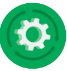
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders

### Summary of model results

### Conclusion, Recommendations, Next Steps